In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [8]:
# Load the dataset
df=pd.read_csv('E:\Price_Predictorrr-main\Price_Predictorrr-main\mobile.csv')
df

,Description,Days,Price,AvailableOn,Rating,Comment
0,"POCO M4 Pro (Cool Blue, 128 GB)",1.0,12945.0,Amazon,5,Nice Mobile Phone But I Want 5G Phone But Hurr...
1,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,2.0,13099.0,Flipkart,4,"Worth for you pay. Good Ram, speed & no glitch..."
2,16.33 cm (6.43 inch) Full HD+ AMOLED Display,3.0,12610.0,Amazon,5,The whole phone awesome for this budget. It ge...
3,64MP + 8MP + 2MP | 16MP Front Camera,4.0,14627.0,Amazon,4,After too many review I have finally choose th...
4,5000 mAh Lithium-ion Polymer Battery,5.0,13706.0,Amazon,4,Performance is good but have some hitting issu...
...,...,...,...,...,...,...
376,NaN,NaN,NaN,NaN,4,"The mobile was awesome,but when I put charging..."
377,NaN,NaN,NaN,NaN,5,Super
378,NaN,NaN,NaN,NaN,5,Excellent
379,NaN,NaN,NaN,NaN,5,The best phone in budget.


In [9]:
# Check for missing values
print(df.isnull().sum())

# Remove rows with missing values
df = df.dropna()

# Check for invalid values
print(df.describe())

# Remove rows with extremely large or invalid values
df = df[df['Price'] < 1e6]  # Adjust the threshold value as per your dataset


Description    375
Days            16
Price           16
AvailableOn     16
Rating           0
Comment          0
dtype: int64
           Days         Price    Rating
count  6.000000      6.000000  6.000000
mean   3.500000  13805.166667  4.500000
std    1.870829   1225.484952  0.547723
min    1.000000  12610.000000  4.000000
25%    2.250000  12983.500000  4.000000
50%    3.500000  13402.500000  4.500000
75%    4.750000  14396.750000  5.000000
max    6.000000  15844.000000  5.000000


In [10]:
# Prepare the data
X = df['Days'].values.reshape(-1, 1)
y = df['Price'].values.reshape(-1, 1)
description = df['Description']
rating = df['Rating']
comment = df['Comment']
available_on = df['AvailableOn']

In [11]:
# Create the linear regression model
model = LinearRegression()

In [12]:
# Fit the model to the data
model.fit(X, y)

LinearRegression()

In [13]:
# Predict the prices for the given days
predicted_prices = model.predict(X)

In [14]:
# Find the best price and corresponding day
best_price_index = y.argmin()
best_day = X[best_price_index][0]
best_price = y[best_price_index][0]
best_description = description[best_price_index]
best_available_on = available_on[best_price_index]

# Check if the description is NaN, if so, fallback to the first line description
if pd.isnull(best_description):
    best_description = description.iloc[0]

best_review = comment[best_price_index]
best_rating = rating[best_price_index]

print("Best price: {} on day {}".format(best_price, best_day))
print("Description: ", best_description)
print("Review: ", best_review)
print("Rating: ", best_rating)
print("Available On: ", best_available_on)

Best price: 12610.0 on day 3.0
Description:  16.33 cm (6.43 inch) Full HD+ AMOLED Display
Review:  The whole phone awesome for this budget. It gets everything you need for a daily day. It suits gaming in good way. It's 8gb + 3gb extension memory. I am satisfied with the product.
Rating:  5
Available On:  Amazon


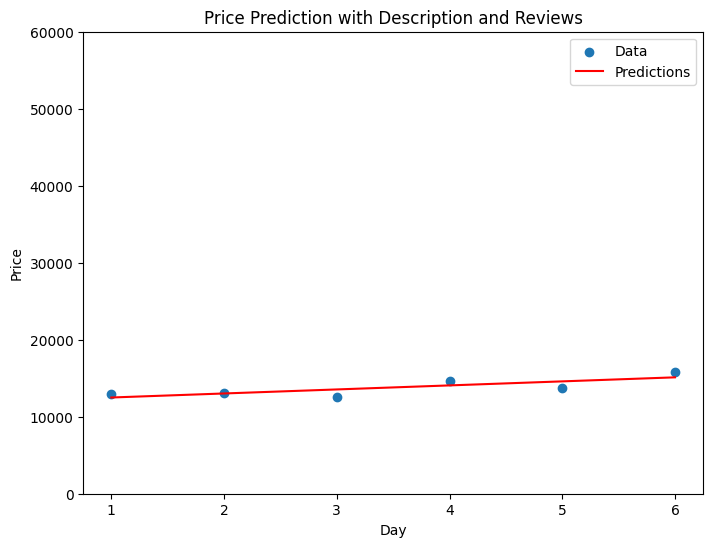

[[142921.86666667]]


In [15]:
# Plot the data and the predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data')
plt.plot(X, predicted_prices, color='red', label='Predictions')
plt.ylim(0, 60000)
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.title('Price Prediction with Description and Reviews')
plt.show()

print(model.predict([[250]]))

In [ ]:
import pickle

# Save the trained model
pickle.dump(model, open('mobile.sav', 'wb'))
